<h1> Notebook 3 - Introducción a k-Nearest Neighbors (kNN)</h1>

En los notebooks anteriores, hemos visto cómo el algoritmo <i>Ordinary Least Squares</i> (OLS) podía aprender un modelo de <b>regresión lineal</b> capaz de predecir una variable <b>continua</b> (problema de regresión). Entre los enfoques de <b>aprendizaje supervisado</b>, existen métododologías permitiendo de predecir una variable <b>discreta</b> (problema de clasificación).

<img src="supervised_learning.png"></img>

En este notebook, introducemos un algoritmo simple para resolver problemas de clasificación: el algoritmo <b>k-vecinos más cercano</b> (kNN).

<h2> 1. Definición </h2>
<p> El algoritmo de <b>k-vecinos más cercano</b> (kNN) es un algortimo de aprendizaje supervisado, de tipo <b>clasificación</b>. Los algoritmos de clasificación permiten predecir <b> variables <u>discretas</u></b> a partir de varias variables características (<i>features</i>).</p>

El algoritmo kNN es '<i>lazy</i>', no hay aprendizaje de parametros como en el caso de OLS. kNN utiliza simplemente observaciones de entrenamiento, representadas por un vector de características donde cada observación tiene una etiqueta (su categoría). El algoritmo kNN clasifica las nuevas observaciones asignando la etiqueta más frecuente entre las muestras de entrenamiento k más cercanas a ese punto de consulta (ver Figura).

<i><center><img src="knn.png">¿Cuál es la categoría del punto verde según kNN?</img></center></i>

Una métrica de distancia comúnmente utilizada es la <b>distancia euclídea</b> o la <b>distancia de Hamming</b>. 




## 2. Clasificar flores en 3 categorías con kNN

En esta sección veremos cómo la librería Scikit-Learn de Python puede ser utilizada para implementar el algoritmo KNN en menos de 20 líneas de código.

Vamos a utilizar el famoso conjunto de datos '<i>iris</i>' para nuestro ejemplo KNN. El conjunto de datos consta de cuatro atributos: anchura del sépalo, longitud del sépalo, anchura del pétalo y longitud del pétalo. Estos son los atributos de tipos específicos de plantas del iris. La tarea es predecir la clase a la que pertenecen estas plantas. Hay tres clases en el set de datos: Iris-setosa, Iris-versicolor e Iris-virgenica. Más detalles del conjunto de datos están disponibles <a href="https://archive.ics.uci.edu/ml/datasets/iris">aquí</a>.


In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

Para importar el conjunto de datos y cargarlo en un dataframe pandas, ejecute el siguiente código:

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 

Para ver cómo es el conjunto de datos, ejecute el siguiente comando:

In [3]:
dataset.head() 

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


El siguiente paso es dividir nuestro conjunto de datos en sus atributos y etiquetas. Para ello, utilice el siguiente código. La variable <b>X</b> contiene las primeras cuatro columnas del conjunto de datos (es decir, los atributos (features)) mientras que <b>y</b> contiene las etiquetas.

In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values 

Para evitar el <b>sobreajuste</b> (<i>overfitting</i>), dividiremos nuestro conjunto de datos en partes de <u>entrenamiento</u> y de <u>prueba</u>, lo que nos da una mejor idea de cómo se comportó nuestro algoritmo durante la fase de prueba. De esta manera nuestro algoritmo es probado en datos no vistos, como lo sería en una aplicación de producción.

Para crear particiones de formación y de prueba, ejecute el siguiente script:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

El script anterior divide el conjunto de datos en 80% de datos de entrenamiento y 20% de datos de prueba. Esto significa que de un total de 150 registros, el conjunto de entrenamiento contendrá 120 registros y el conjunto de pruebas contiene 30 de esos registros.

<b>Escalado de características</b> (feature scaling)

Antes de hacer cualquier predicción real, siempre es una buena práctica escalar las características para que todas ellas puedan ser evaluadas uniformemente. Wikipedia explica el razonamiento bastante bien: "<i>Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.</i>"

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

<b>Entrenamiento y Predicciones</b>

Es extremadamente sencillo entrenar el algoritmo KNN y hacer predicciones con él, especialmente cuando se utiliza Scikit-Learn.

El primer paso es importar la clase KNeighborsClassifier de la biblioteca sklearn.neighbors. En la segunda línea, esta clase se inicializa con un parámetro, n_neigbours. Este es básicamente el valor para el K. No hay ningún valor ideal para el K y se selecciona después de la prueba y la evaluación, sin embargo, para empezar, 5 parece ser el valor más comúnmente utilizado para el algoritmo KNN.

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The final step is to make predictions on our test data. To do so, execute the following script:

In [8]:
y_pred = classifier.predict(X_test)  

<b>Evaluación del modelo</b>

Para evaluar un modelo de clasificación, las métricas más utilizadas son la matriz de confusión, la precisión, la exhaustividad y la puntuación f1. Los métodos confusion_matrix y classification_report de las métricas sklearn.métricas pueden ser usados para calcular estas métricas. Echa un vistazo al siguiente script:

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 7  0  0]
 [ 0 13  1]
 [ 0  2  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.88      0.78      0.82         9

    avg / total       0.90      0.90      0.90        30



Los resultados muestran que nuestro modelo KNN fue capaz de clasificar los 30 registros en el conjunto de pruebas con una precisión general de 90%, lo que es relativamente bueno. Aunque el modelo funcionó muy bien con este conjunto de datos, no espere los mismos resultados con todas las aplicaciones. Como se mencionó anteriormente, KNN no siempre funciona tan bien con características de alta dimensionalidad o categóricas.

<b>Comparación de la tasa de error con el valor de K</b>

En la sección de entrenamiento y predicción dijimos que no hay forma de saber de antemano qué valor de K produce los mejores resultados en el primer intento. Elegimos aleatoriamente 5 como valor de K y el resultado es una precisión del 100%.

Una manera de ayudarle a encontrar el mejor valor de K es graficar el gráfico del valor de K y la tasa de error correspondiente para el conjunto de datos.

En esta sección, graficaremos el error medio para los valores predichos del equipo de prueba para todos los valores de K entre 1 y 40.

Para ello, primero calculamos la media de error para todos los valores pronosticados donde K oscila entre 1 y 40. Ejecute el siguiente script:

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

El script anterior ejecuta un bucle de 1 a 40. En cada iteración se calcula el error medio para los valores pronosticados del equipo de prueba y el resultado se adjunta a la lista de errores.

El siguiente paso es graficar los valores de error contra los valores de K. Ejecute el siguiente script para crear el gráfico:

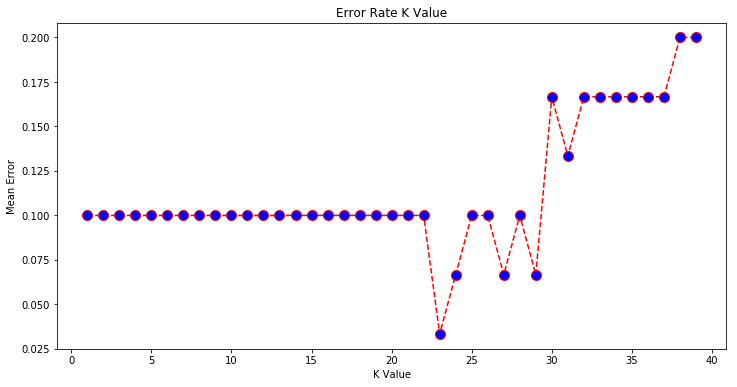

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

<b>Pregunta</b>: ¿Cuál el valor de K que permite tomar mejores decisiones?

Visualizar la clasificación de datos con varios valores de K, en 2 dimensiones:


<b>Conclusión</b>

KNN es un algoritmo de clasificación simple pero potente. No requiere entrenamiento para hacer predicciones, que es típicamente una de las partes más difíciles de un algoritmo de aprendizaje de máquina. El algoritmo KNN se ha utilizado ampliamente para encontrar la similitud de documentos y el reconocimiento de patrones. También se ha empleado para el desarrollo de sistemas de recomendación y para la reducción de la dimensionalidad y los pasos de preprocesamiento de la visión por computador, en particular las tareas de reconocimiento facial.

A partir de aquí, le aconsejaría implementar el algoritmo KNN para un conjunto de datos de clasificación diferente. Varíe el tamaño de la prueba y el entrenamiento junto con el valor K para ver en qué se diferencian los resultados y cómo puede mejorar la precisión de su algoritmo. Una buena colección de conjuntos de datos de clasificación está disponible <a href="https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table">aquí</a> para que juegues con ellos.

## 3. Trabajo práctico

Elegir otro problema de clasificación a partir de los datasets disponibles <a href="https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table">aquí</a>, utilizar un algoritmo kNN para resolver el problema, evaluando el modelo obtenido con una matriz de confusión.

In [12]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
'''7. Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

   Statistics for numeric domains:

		Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
	Min	0.075	0.055	0.000	0.002	0.001	0.001	0.002	    1
	Max	0.815	0.650	1.130	2.826	1.488	0.760	1.005	   29
	Mean	0.524	0.408	0.140	0.829	0.359	0.181	0.239	9.934
	SD	0.120	0.099	0.042	0.490	0.222	0.110	0.139	3.224
	Correl	0.557	0.575	0.557	0.540	0.421	0.504	0.628	  1.0
'''
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Assign colum names to the dataset
names = ['Sex','length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shel weight','Rings']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 
dataset.head()



,Sex,length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shel weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
dataset.loc[dataset['Sex']=='M', 'Sex'] = 2
dataset.loc[dataset['Sex']=='F', 'Sex'] = 1
dataset.loc[dataset['Sex']=='I', 'Sex'] = 0

dataset.head()


,Sex,length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shel weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1:].values

In [15]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [16]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  9  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 20 27  5  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 22 28 22 13  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 25 42 51 14  1  1  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  7 32 62 42 12  2  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 17 51 51 27  4  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  9 25 46 23  6  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 21 28 17  7  2  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  9 22 14  2  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5 14  9  4  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3

/usr/local/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


no es capaz de acertar en la mayor parte de los casos

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


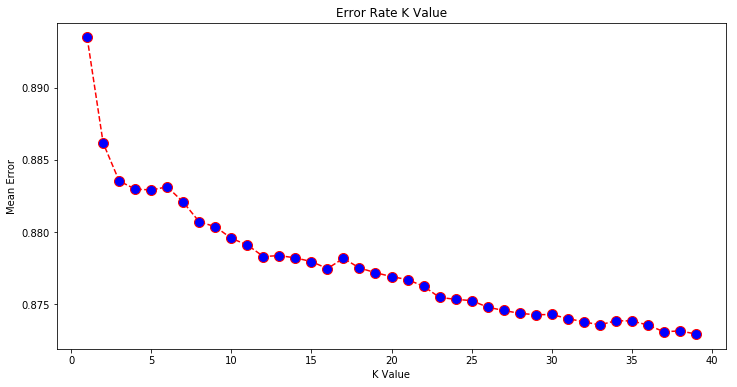

In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()